# EXPERIMENT 2: Changing S

In YOLOv1, the input image is divided into a grid of cells, and each cell is responsible for predicting the bounding boxes and class probabilities for any objects that are centered within that cell. The size of the cells is an important hyperparameter that can affect the performance of the model.

We will try:

- S = 2
- S = 3 
- S = 5 
- S = 7 (paper) 
- S = 10

In [1]:
import torch 
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.ops import nms
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import matplotlib.pyplot as plt
from dataset import AfricanWildlifeDataset
from loss import YoloLoss
from YOLOv1 import YOLOv1, YOLO, YOLO2
from train import train
from test import test
from utils import plot_bbox, compute_ap, get_boxes

def convert_dict(d, with_score=True):
    boxes_by_img = []
    for key, val in d.items():
        l = {}
        l['boxes'] = torch.tensor([x[2:] for x in val])
        if with_score:
            l['scores'] = torch.tensor([x[1] for x in val])
        l['labels'] = torch.tensor([int(x[0]) for x in val])
        boxes_by_img.append(l)
    return boxes_by_img

In [2]:
LEARNING_RATE = 2e-5
DEVICE = "cuda" if torch.cuda.is_available else "cpu"
TRAIN_BATCH_SIZE = 20
TEST_BATCH_SIZE = 5
EPOCHS = 61
TRAIN_DIR = 'African_Wildlife/train'
TEST_DIR = 'African_Wildlife/test'
LABEL_DIR = 'African_Wildlife/annotations'
B, C = 2, 4

# 1. S = 2 (Epochs = 60) 

In [14]:
S = 2

In [18]:
# load data
transform = transforms.Compose([transforms.Resize((448, 448)), transforms.ToTensor(), transforms.Normalize(0,1)])

train_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, transform=transform)
train_loader = DataLoader(dataset = train_set, batch_size = TRAIN_BATCH_SIZE, shuffle = True)

test_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, istesting=True, transform=transform)
test_loader = DataLoader(dataset=test_set, batch_size=TEST_BATCH_SIZE, shuffle= False)

In [19]:
# model
model_s2 = YOLO2(input_channels=3, S=S, B=B, C=C).to(DEVICE)
optimizer = optim.Adam(model_s2.parameters(), lr=LEARNING_RATE)
criterion = YoloLoss(S=S, B=B, C=C)

In [20]:
# training 
loss_hist = train(train_loader, model_s2, optimizer, criterion, EPOCHS, DEVICE, 
                  ckpt_filename='experiment_2/model_S2.tar', load_model=True, save_epochs=5)

100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.282]


 EPOCH 1:  Mean loss 0.458


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.284]


 EPOCH 2:  Mean loss 0.279


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.264]


 EPOCH 3:  Mean loss 0.264


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.241]


 EPOCH 4:  Mean loss 0.251


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.247]


 EPOCH 5:  Mean loss 0.238
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.215]


 EPOCH 6:  Mean loss 0.226


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.243]


 EPOCH 7:  Mean loss 0.210


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.241]


 EPOCH 8:  Mean loss 0.204


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.192]


 EPOCH 9:  Mean loss 0.183


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.166]


 EPOCH 10:  Mean loss 0.168
-> Saving checkpoint


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.177] 


 EPOCH 11:  Mean loss 0.152


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.123]


 EPOCH 12:  Mean loss 0.141


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.11]  


 EPOCH 13:  Mean loss 0.129


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.135] 


 EPOCH 14:  Mean loss 0.114


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0914]


 EPOCH 15:  Mean loss 0.102
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.136] 


 EPOCH 16:  Mean loss 0.087


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0853]


 EPOCH 17:  Mean loss 0.080


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0565]


 EPOCH 18:  Mean loss 0.074


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0582]


 EPOCH 19:  Mean loss 0.071


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0479]


 EPOCH 20:  Mean loss 0.060
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.046] 


 EPOCH 21:  Mean loss 0.057


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0415]


 EPOCH 22:  Mean loss 0.057


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0449]


 EPOCH 23:  Mean loss 0.053


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0711]


 EPOCH 24:  Mean loss 0.051


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0375]


 EPOCH 25:  Mean loss 0.047
-> Saving checkpoint


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0466]


 EPOCH 26:  Mean loss 0.046


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0472]


 EPOCH 27:  Mean loss 0.042


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0416]


 EPOCH 28:  Mean loss 0.042


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0432]


 EPOCH 29:  Mean loss 0.041


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0425]


 EPOCH 30:  Mean loss 0.037
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.026] 


 EPOCH 31:  Mean loss 0.037


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0315]


 EPOCH 32:  Mean loss 0.035


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0387]


 EPOCH 33:  Mean loss 0.033


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0274]


 EPOCH 34:  Mean loss 0.034


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0221]


 EPOCH 35:  Mean loss 0.032
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0201]


 EPOCH 36:  Mean loss 0.034


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0294]


 EPOCH 37:  Mean loss 0.031


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0235]


 EPOCH 38:  Mean loss 0.029


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0332]


 EPOCH 39:  Mean loss 0.028


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0212]


 EPOCH 40:  Mean loss 0.030
-> Saving checkpoint


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.035] 


 EPOCH 41:  Mean loss 0.027


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.03]  


 EPOCH 42:  Mean loss 0.027


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0394]


 EPOCH 43:  Mean loss 0.029


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.019] 


 EPOCH 44:  Mean loss 0.030


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.028] 


 EPOCH 45:  Mean loss 0.026
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0279]


 EPOCH 46:  Mean loss 0.027


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0203]


 EPOCH 47:  Mean loss 0.027


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0183]


 EPOCH 48:  Mean loss 0.023


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0278]


 EPOCH 49:  Mean loss 0.023


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0143]


 EPOCH 50:  Mean loss 0.024
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0201]


 EPOCH 51:  Mean loss 0.023


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0272]


 EPOCH 52:  Mean loss 0.024


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0235]


 EPOCH 53:  Mean loss 0.023


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0268]


 EPOCH 54:  Mean loss 0.023


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0158]


 EPOCH 55:  Mean loss 0.023
-> Saving checkpoint


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0253]


 EPOCH 56:  Mean loss 0.024


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0179] 


 EPOCH 57:  Mean loss 0.021


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0186]


 EPOCH 58:  Mean loss 0.021


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0234]


 EPOCH 59:  Mean loss 0.021


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0189] 


 EPOCH 60:  Mean loss 0.023
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0325]

 EPOCH 61:  Mean loss 0.022


Text(0, 0.5, 'Loss')

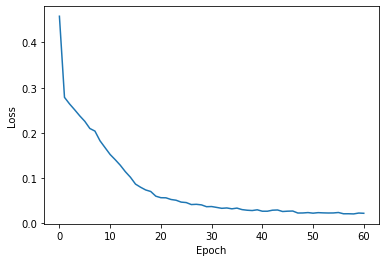

In [21]:
# plot training loss
plt.plot(range(len(loss_hist)), loss_hist)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [24]:
# testing 
y_pred, y_true = test(test_loader, model_s2, DEVICE, filter_params=[0.6, True])
# non-max-suppression
pred_boxes, true_boxes = get_boxes(y_pred, y_true)

pred = {}
pred = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in pred_boxes:
    pred[box[0]].append(box[1:])

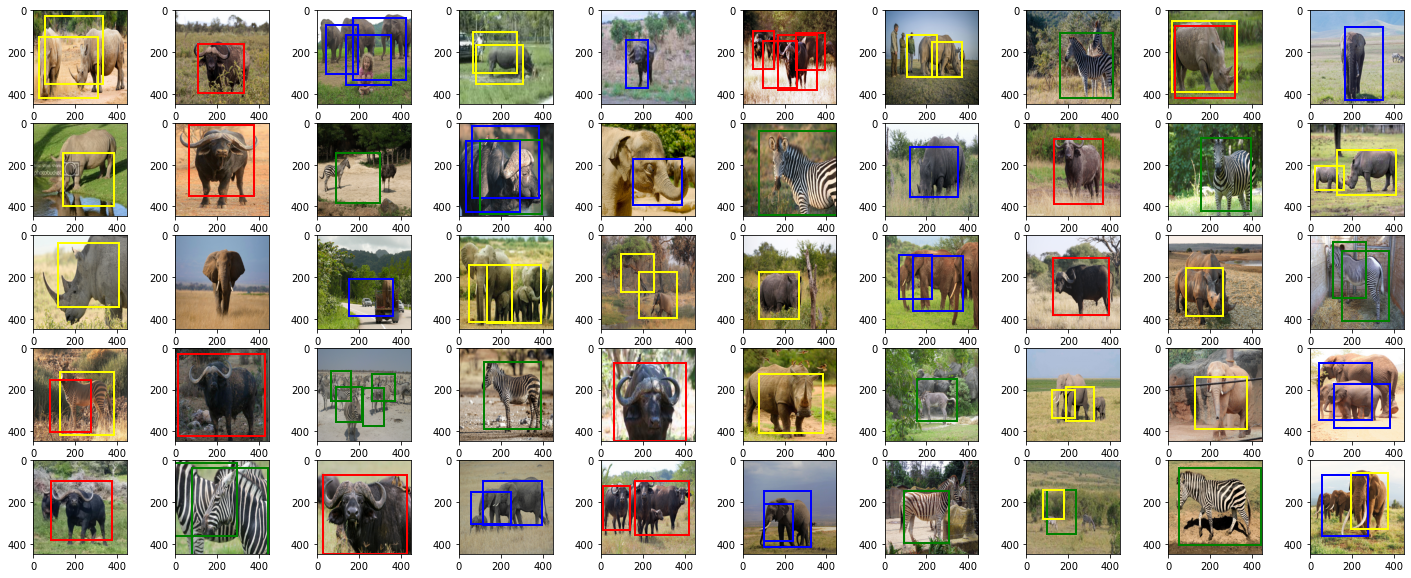

In [25]:
# plot predictions
fig, ax = plt.subplots(5, 10, figsize=(25, 10))
for idx in range(50):
    bbx = pred[idx]
    plot_bbox(idx, test_set, bbx, ax=ax.flatten()[idx])

In [26]:
# map
gt = {}
gt = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in true_boxes:
    gt[box[0]].append(box[1:])
    
predictions = convert_dict(pred)
target = convert_dict(gt, with_score=False)

th = torch.arange(0.5, 1, 0.05).tolist()
m_ap = MeanAveragePrecision(box_format='xywh', iou_type="bbox", iou_thresholds=th)
m_ap.update(predictions, target)
ap = m_ap.compute()

In [27]:
ap

{'map': tensor(0.1150),
 'map_50': tensor(0.3413),
 'map_75': tensor(0.0566),
 'map_small': tensor(0.1150),
 'map_medium': tensor(-1.),
 'map_large': tensor(-1.),
 'mar_1': tensor(0.1653),
 'mar_10': tensor(0.1986),
 'mar_100': tensor(0.1986),
 'mar_small': tensor(0.1986),
 'mar_medium': tensor(-1.),
 'mar_large': tensor(-1.),
 'map_per_class': tensor(-1.),
 'mar_100_per_class': tensor(-1.)}

# 2. S = 3

In [28]:
S = 3

In [29]:
# load data
transform = transforms.Compose([transforms.Resize((448, 448)), transforms.ToTensor(), transforms.Normalize(0,1)])

train_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, transform=transform)
train_loader = DataLoader(dataset = train_set, batch_size = TRAIN_BATCH_SIZE, shuffle = True)

test_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, istesting=True, transform=transform)
test_loader = DataLoader(dataset=test_set, batch_size=TEST_BATCH_SIZE, shuffle= False)

In [30]:
# model
model_s3 = YOLO2(input_channels=3, S=S, B=B, C=C).to(DEVICE)
optimizer = optim.Adam(model_s3.parameters(), lr=LEARNING_RATE)
criterion = YoloLoss(S=S, B=B, C=C)

In [32]:
# training 
loss_hist = train(train_loader, model_s3, optimizer, criterion, EPOCHS, DEVICE, 
                  ckpt_filename='experiment_2/model_S3.tar', load_model=False, save_epochs=5)

100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.127]


 EPOCH 1:  Mean loss 0.306


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.126] 


 EPOCH 2:  Mean loss 0.142


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.114] 


 EPOCH 3:  Mean loss 0.129


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0759]


 EPOCH 4:  Mean loss 0.122


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0954]


 EPOCH 5:  Mean loss 0.116
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.108] 


 EPOCH 6:  Mean loss 0.109


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0829]


 EPOCH 7:  Mean loss 0.103


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0824]


 EPOCH 8:  Mean loss 0.097


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0935]


 EPOCH 9:  Mean loss 0.092


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0931]


 EPOCH 10:  Mean loss 0.087
-> Saving checkpoint


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0697]


 EPOCH 11:  Mean loss 0.080


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0785]


 EPOCH 12:  Mean loss 0.076


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.059] 


 EPOCH 13:  Mean loss 0.071


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0626]


 EPOCH 14:  Mean loss 0.063


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0794]


 EPOCH 15:  Mean loss 0.060
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0609]


 EPOCH 16:  Mean loss 0.054


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0804]


 EPOCH 17:  Mean loss 0.052


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0392]


 EPOCH 18:  Mean loss 0.046


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0374]


 EPOCH 19:  Mean loss 0.042


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0405]


 EPOCH 20:  Mean loss 0.039
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0361]


 EPOCH 21:  Mean loss 0.036


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0316]


 EPOCH 22:  Mean loss 0.034


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0516]


 EPOCH 23:  Mean loss 0.032


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0337]


 EPOCH 24:  Mean loss 0.031


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0342]


 EPOCH 25:  Mean loss 0.028
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.11it/s, loss=0.0234]


 EPOCH 26:  Mean loss 0.026


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0199]


 EPOCH 27:  Mean loss 0.025


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0174]


 EPOCH 28:  Mean loss 0.024


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.023] 


 EPOCH 29:  Mean loss 0.021


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0251]


 EPOCH 30:  Mean loss 0.021
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0311]


 EPOCH 31:  Mean loss 0.020


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.018] 


 EPOCH 32:  Mean loss 0.018


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0183]


 EPOCH 33:  Mean loss 0.019


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0259]


 EPOCH 34:  Mean loss 0.018


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.016]  


 EPOCH 35:  Mean loss 0.017
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0185]


 EPOCH 36:  Mean loss 0.017


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0407]


 EPOCH 37:  Mean loss 0.016


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0231] 


 EPOCH 38:  Mean loss 0.017


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0113]


 EPOCH 39:  Mean loss 0.017


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0139]


 EPOCH 40:  Mean loss 0.016
-> Saving checkpoint


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0123] 


 EPOCH 41:  Mean loss 0.013


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0141] 


 EPOCH 42:  Mean loss 0.015


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0113] 


 EPOCH 43:  Mean loss 0.014


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0194] 


 EPOCH 44:  Mean loss 0.015


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.00959]


 EPOCH 45:  Mean loss 0.014
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0153] 


 EPOCH 46:  Mean loss 0.014


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.015]  


 EPOCH 47:  Mean loss 0.014


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0229] 


 EPOCH 48:  Mean loss 0.013


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0238] 


 EPOCH 49:  Mean loss 0.012


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0144] 


 EPOCH 50:  Mean loss 0.013
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0114] 


 EPOCH 51:  Mean loss 0.011


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0127] 


 EPOCH 52:  Mean loss 0.011


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0156] 


 EPOCH 53:  Mean loss 0.012


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0114] 


 EPOCH 54:  Mean loss 0.012


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.00987]


 EPOCH 55:  Mean loss 0.012
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.017]  


 EPOCH 56:  Mean loss 0.011


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0117] 


 EPOCH 57:  Mean loss 0.011


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0109] 


 EPOCH 58:  Mean loss 0.011


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.00949]


 EPOCH 59:  Mean loss 0.011


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.00839]


 EPOCH 60:  Mean loss 0.010
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.011]  

 EPOCH 61:  Mean loss 0.010


Text(0, 0.5, 'Loss')

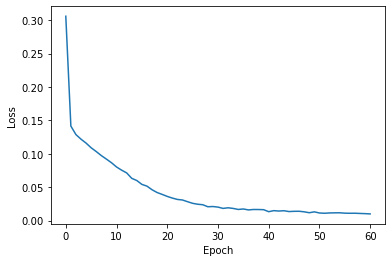

In [37]:
# plot training loss
plt.plot(range(len(loss_hist)), loss_hist)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [33]:
# testing 
y_pred, y_true = test(test_loader, model_s3, DEVICE, filter_params=[0.6, True])
# non-max-suppression
pred_boxes, true_boxes = get_boxes(y_pred, y_true)

pred = {}
pred = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in pred_boxes:
    pred[box[0]].append(box[1:])

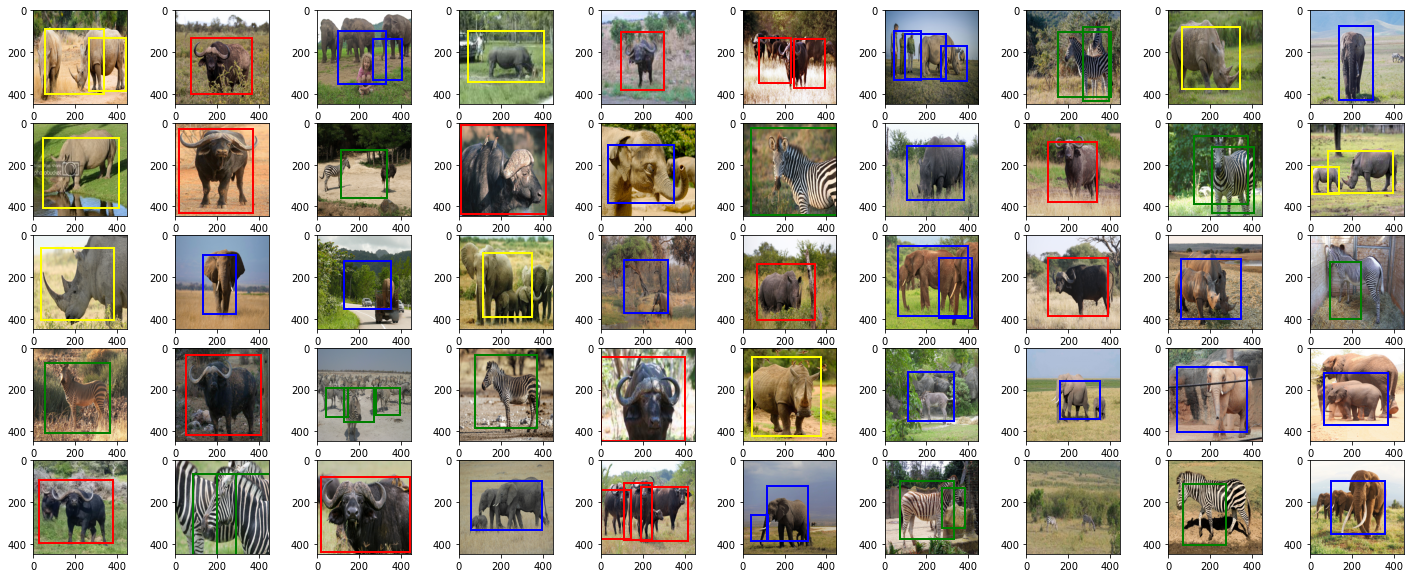

In [34]:
# plot predictions
fig, ax = plt.subplots(5, 10, figsize=(25, 10))
for idx in range(50):
    bbx = pred[idx]
    plot_bbox(idx, test_set, bbx, ax=ax.flatten()[idx])

In [35]:
# map
gt = {}
gt = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in true_boxes:
    gt[box[0]].append(box[1:])
    
predictions = convert_dict(pred)
target = convert_dict(gt, with_score=False)

th = torch.arange(0.5, 1, 0.05).tolist()
m_ap = MeanAveragePrecision(box_format='xywh', iou_type="bbox", iou_thresholds=th)
m_ap.update(predictions, target)
ap = m_ap.compute()

In [36]:
ap

{'map': tensor(0.1303),
 'map_50': tensor(0.3308),
 'map_75': tensor(0.0731),
 'map_small': tensor(0.1303),
 'map_medium': tensor(-1.),
 'map_large': tensor(-1.),
 'mar_1': tensor(0.1827),
 'mar_10': tensor(0.1993),
 'mar_100': tensor(0.1993),
 'mar_small': tensor(0.1993),
 'mar_medium': tensor(-1.),
 'mar_large': tensor(-1.),
 'map_per_class': tensor(-1.),
 'mar_100_per_class': tensor(-1.)}

# 3. S = 5

In [3]:
S = 5 

In [4]:
# load data
transform = transforms.Compose([transforms.Resize((448, 448)), transforms.ToTensor(), transforms.Normalize(0,1)])

train_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, transform=transform)
train_loader = DataLoader(dataset = train_set, batch_size = TRAIN_BATCH_SIZE, shuffle = True)

test_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, istesting=True, transform=transform)
test_loader = DataLoader(dataset=test_set, batch_size=TEST_BATCH_SIZE, shuffle= False)

In [5]:
# model
model_s5 = YOLO2(input_channels=3, S=S, B=B, C=C).to(DEVICE)
optimizer = optim.Adam(model_s5.parameters(), lr=LEARNING_RATE)
criterion = YoloLoss(S=S, B=B, C=C)

In [6]:
# training 
loss_hist = train(train_loader, model_s5, optimizer, criterion, EPOCHS, DEVICE, 
                  ckpt_filename='experiment_2/model_S5.tar', load_model=False, save_epochs=5)

100%|██████████| 60/60 [00:28<00:00,  2.08it/s, loss=0.136] 


 EPOCH 1:  Mean loss 0.227


100%|██████████| 60/60 [00:27<00:00,  2.18it/s, loss=0.0853]


 EPOCH 2:  Mean loss 0.103


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0914]


 EPOCH 3:  Mean loss 0.082


100%|██████████| 60/60 [00:27<00:00,  2.18it/s, loss=0.0648]


 EPOCH 4:  Mean loss 0.076


100%|██████████| 60/60 [00:27<00:00,  2.17it/s, loss=0.0554]


 EPOCH 5:  Mean loss 0.072
-> Saving checkpoint


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0625]


 EPOCH 6:  Mean loss 0.069


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0727]


 EPOCH 7:  Mean loss 0.066


100%|██████████| 60/60 [00:27<00:00,  2.17it/s, loss=0.0628]


 EPOCH 8:  Mean loss 0.063


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0603]


 EPOCH 9:  Mean loss 0.060


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0533]


 EPOCH 10:  Mean loss 0.057
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0441]


 EPOCH 11:  Mean loss 0.054


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0415]


 EPOCH 12:  Mean loss 0.051


100%|██████████| 60/60 [00:27<00:00,  2.17it/s, loss=0.0309]


 EPOCH 13:  Mean loss 0.049


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0451]


 EPOCH 14:  Mean loss 0.045


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0359]


 EPOCH 15:  Mean loss 0.043
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.11it/s, loss=0.0577]


 EPOCH 16:  Mean loss 0.040


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0405]


 EPOCH 17:  Mean loss 0.037


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.027] 


 EPOCH 18:  Mean loss 0.035


100%|██████████| 60/60 [00:30<00:00,  1.97it/s, loss=0.0307]


 EPOCH 19:  Mean loss 0.033


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0449]


 EPOCH 20:  Mean loss 0.030
-> Saving checkpoint


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0346]


 EPOCH 21:  Mean loss 0.028


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0186]


 EPOCH 22:  Mean loss 0.028


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0245]


 EPOCH 23:  Mean loss 0.025


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0172]


 EPOCH 24:  Mean loss 0.023


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0278]


 EPOCH 25:  Mean loss 0.022
-> Saving checkpoint


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0229]


 EPOCH 26:  Mean loss 0.021


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0153]


 EPOCH 27:  Mean loss 0.020


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0192]


 EPOCH 28:  Mean loss 0.019


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0178]


 EPOCH 29:  Mean loss 0.017


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0151]


 EPOCH 30:  Mean loss 0.017
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0218]


 EPOCH 31:  Mean loss 0.016


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0135]


 EPOCH 32:  Mean loss 0.015


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0268] 


 EPOCH 33:  Mean loss 0.015


100%|██████████| 60/60 [00:27<00:00,  2.17it/s, loss=0.0146] 


 EPOCH 34:  Mean loss 0.014


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0144] 


 EPOCH 35:  Mean loss 0.013
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00939]


 EPOCH 36:  Mean loss 0.012


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0168] 


 EPOCH 37:  Mean loss 0.012


100%|██████████| 60/60 [00:27<00:00,  2.17it/s, loss=0.011]  


 EPOCH 38:  Mean loss 0.012


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.00753]


 EPOCH 39:  Mean loss 0.011


100%|██████████| 60/60 [00:30<00:00,  1.98it/s, loss=0.0115] 


 EPOCH 40:  Mean loss 0.011
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0112] 


 EPOCH 41:  Mean loss 0.011


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.00793]


 EPOCH 42:  Mean loss 0.010


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0102] 


 EPOCH 43:  Mean loss 0.011


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0075] 


 EPOCH 44:  Mean loss 0.010


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.0103] 


 EPOCH 45:  Mean loss 0.010
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.00882]


 EPOCH 46:  Mean loss 0.010


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.00833]


 EPOCH 47:  Mean loss 0.009


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0145] 


 EPOCH 48:  Mean loss 0.009


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.00708]


 EPOCH 49:  Mean loss 0.009


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00882]


 EPOCH 50:  Mean loss 0.009
-> Saving checkpoint


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.00626]


 EPOCH 51:  Mean loss 0.009


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0048] 


 EPOCH 52:  Mean loss 0.009


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.00586]


 EPOCH 53:  Mean loss 0.009


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0088] 


 EPOCH 54:  Mean loss 0.008


100%|██████████| 60/60 [00:27<00:00,  2.16it/s, loss=0.00961]


 EPOCH 55:  Mean loss 0.008
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0059] 


 EPOCH 56:  Mean loss 0.007


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.00705]


 EPOCH 57:  Mean loss 0.008


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.00694]


 EPOCH 58:  Mean loss 0.008


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.00489]


 EPOCH 59:  Mean loss 0.007


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.00763]


 EPOCH 60:  Mean loss 0.007
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.00596]

 EPOCH 61:  Mean loss 0.007


Text(0, 0.5, 'Loss')

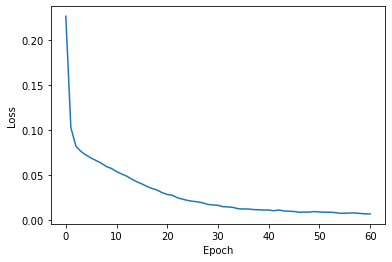

In [7]:
# plot training loss
plt.plot(range(len(loss_hist)), loss_hist)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [8]:
# testing 
y_pred, y_true = test(test_loader, model_s5, DEVICE, filter_params=[0.6, True])
# non-max-suppression
pred_boxes, true_boxes = get_boxes(y_pred, y_true)

pred = {}
pred = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in pred_boxes:
    pred[box[0]].append(box[1:])

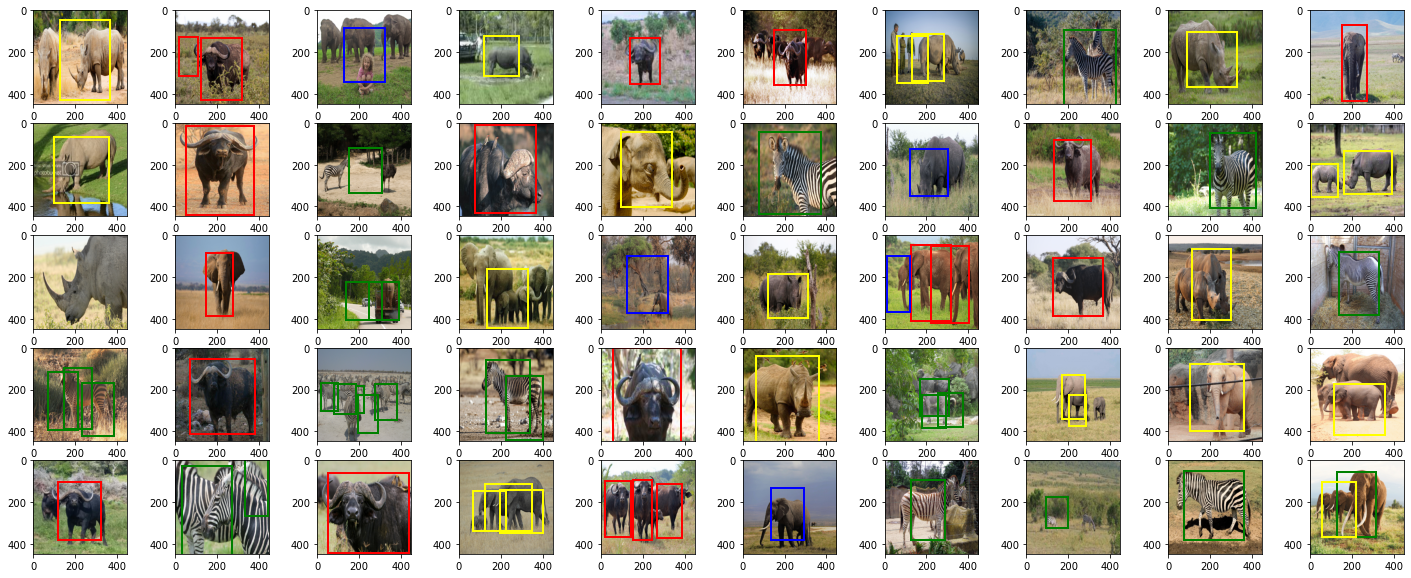

In [9]:
# plot predictions
fig, ax = plt.subplots(5, 10, figsize=(25, 10))
for idx in range(50):
    bbx = pred[idx]
    plot_bbox(idx, test_set, bbx, ax=ax.flatten()[idx])

In [10]:
# map
gt = {}
gt = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in true_boxes:
    gt[box[0]].append(box[1:])
    
predictions = convert_dict(pred)
target = convert_dict(gt, with_score=False)

th = torch.arange(0.5, 1, 0.05).tolist()
m_ap = MeanAveragePrecision(box_format='xywh', iou_type="bbox", iou_thresholds=th)
m_ap.update(predictions, target)
ap = m_ap.compute()

In [11]:
ap 

{'map': tensor(0.0959),
 'map_50': tensor(0.2577),
 'map_75': tensor(0.0542),
 'map_small': tensor(0.0959),
 'map_medium': tensor(-1.),
 'map_large': tensor(-1.),
 'mar_1': tensor(0.1358),
 'mar_10': tensor(0.1564),
 'mar_100': tensor(0.1564),
 'mar_small': tensor(0.1564),
 'mar_medium': tensor(-1.),
 'mar_large': tensor(-1.),
 'map_per_class': tensor(-1.),
 'mar_100_per_class': tensor(-1.)}

# 4. S = 7

In [12]:
S = 7 

In [13]:
# load data
transform = transforms.Compose([transforms.Resize((448, 448)), transforms.ToTensor(), transforms.Normalize(0,1)])

train_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, transform=transform)
train_loader = DataLoader(dataset = train_set, batch_size = TRAIN_BATCH_SIZE, shuffle = True)

test_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, istesting=True, transform=transform)
test_loader = DataLoader(dataset=test_set, batch_size=TEST_BATCH_SIZE, shuffle= False)

In [14]:
# model
model_s7 = YOLO2(input_channels=3, S=S, B=B, C=C).to(DEVICE)
optimizer = optim.Adam(model_s7.parameters(), lr=LEARNING_RATE)
criterion = YoloLoss(S=S, B=B, C=C)

In [15]:
# training 
loss_hist = train(train_loader, model_s7, optimizer, criterion, EPOCHS, DEVICE, 
                  ckpt_filename='experiment_2/model_S7.tar', load_model=False, save_epochs=5)

100%|██████████| 60/60 [00:28<00:00,  2.10it/s, loss=0.115]


 EPOCH 1:  Mean loss 0.188


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0911]


 EPOCH 2:  Mean loss 0.090


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0378]


 EPOCH 3:  Mean loss 0.061


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0449]


 EPOCH 4:  Mean loss 0.052


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0578]


 EPOCH 5:  Mean loss 0.048
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.11it/s, loss=0.0589]


 EPOCH 6:  Mean loss 0.046


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0404]


 EPOCH 7:  Mean loss 0.044


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0448]


 EPOCH 8:  Mean loss 0.042


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0471]


 EPOCH 9:  Mean loss 0.041


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0332]


 EPOCH 10:  Mean loss 0.039
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.05]  


 EPOCH 11:  Mean loss 0.037


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0343]


 EPOCH 12:  Mean loss 0.036


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0243]


 EPOCH 13:  Mean loss 0.034


100%|██████████| 60/60 [00:28<00:00,  2.11it/s, loss=0.0362]


 EPOCH 14:  Mean loss 0.033


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0433]


 EPOCH 15:  Mean loss 0.031
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0237]


 EPOCH 16:  Mean loss 0.030


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0273]


 EPOCH 17:  Mean loss 0.028


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0255]


 EPOCH 18:  Mean loss 0.026


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0286]


 EPOCH 19:  Mean loss 0.025


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0346]


 EPOCH 20:  Mean loss 0.024
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0322]


 EPOCH 21:  Mean loss 0.022


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0268]


 EPOCH 22:  Mean loss 0.021


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0194]


 EPOCH 23:  Mean loss 0.020


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0182]


 EPOCH 24:  Mean loss 0.019


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0224]


 EPOCH 25:  Mean loss 0.018
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.08it/s, loss=0.0133]


 EPOCH 26:  Mean loss 0.017


100%|██████████| 60/60 [00:31<00:00,  1.88it/s, loss=0.0194]


 EPOCH 27:  Mean loss 0.016


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0147]


 EPOCH 28:  Mean loss 0.015


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0161] 


 EPOCH 29:  Mean loss 0.014


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0149] 


 EPOCH 30:  Mean loss 0.014
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.11it/s, loss=0.013]  


 EPOCH 31:  Mean loss 0.014


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0138] 


 EPOCH 32:  Mean loss 0.012


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0147] 


 EPOCH 33:  Mean loss 0.011


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0132] 


 EPOCH 34:  Mean loss 0.011


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.00942]


 EPOCH 35:  Mean loss 0.011
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0118] 


 EPOCH 36:  Mean loss 0.011


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.00787]


 EPOCH 37:  Mean loss 0.010


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.00919]


 EPOCH 38:  Mean loss 0.010


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00865]


 EPOCH 39:  Mean loss 0.009


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0104] 


 EPOCH 40:  Mean loss 0.009
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0097] 


 EPOCH 41:  Mean loss 0.009


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0104] 


 EPOCH 42:  Mean loss 0.009


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00841]


 EPOCH 43:  Mean loss 0.008


100%|██████████| 60/60 [00:28<00:00,  2.10it/s, loss=0.00722]


 EPOCH 44:  Mean loss 0.008


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0119] 


 EPOCH 45:  Mean loss 0.008
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0137] 


 EPOCH 46:  Mean loss 0.008


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.00667]


 EPOCH 47:  Mean loss 0.007


100%|██████████| 60/60 [00:28<00:00,  2.10it/s, loss=0.00858]


 EPOCH 48:  Mean loss 0.007


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.00607]


 EPOCH 49:  Mean loss 0.007


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0098] 


 EPOCH 50:  Mean loss 0.007
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.11it/s, loss=0.00422]


 EPOCH 51:  Mean loss 0.007


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00792]


 EPOCH 52:  Mean loss 0.006


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.00536]


 EPOCH 53:  Mean loss 0.007


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00865]


 EPOCH 54:  Mean loss 0.006


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00698]


 EPOCH 55:  Mean loss 0.006
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.00416]


 EPOCH 56:  Mean loss 0.006


100%|██████████| 60/60 [00:28<00:00,  2.10it/s, loss=0.00548]


 EPOCH 57:  Mean loss 0.006


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.00516]


 EPOCH 58:  Mean loss 0.006


100%|██████████| 60/60 [00:30<00:00,  1.95it/s, loss=0.00552]


 EPOCH 59:  Mean loss 0.005


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00533]


 EPOCH 60:  Mean loss 0.006
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.10it/s, loss=0.00742]

 EPOCH 61:  Mean loss 0.006


Text(0, 0.5, 'Loss')

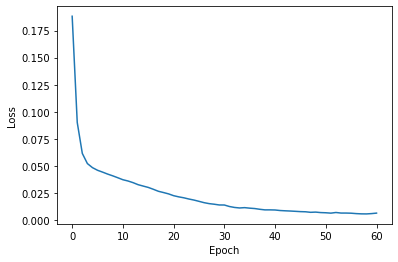

In [16]:
# plot training loss
plt.plot(range(len(loss_hist)), loss_hist)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [17]:
# testing 
y_pred, y_true = test(test_loader, model_s7, DEVICE, filter_params=[0.6, True])
# non-max-suppression
pred_boxes, true_boxes = get_boxes(y_pred, y_true)

pred = {}
pred = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in pred_boxes:
    pred[box[0]].append(box[1:])

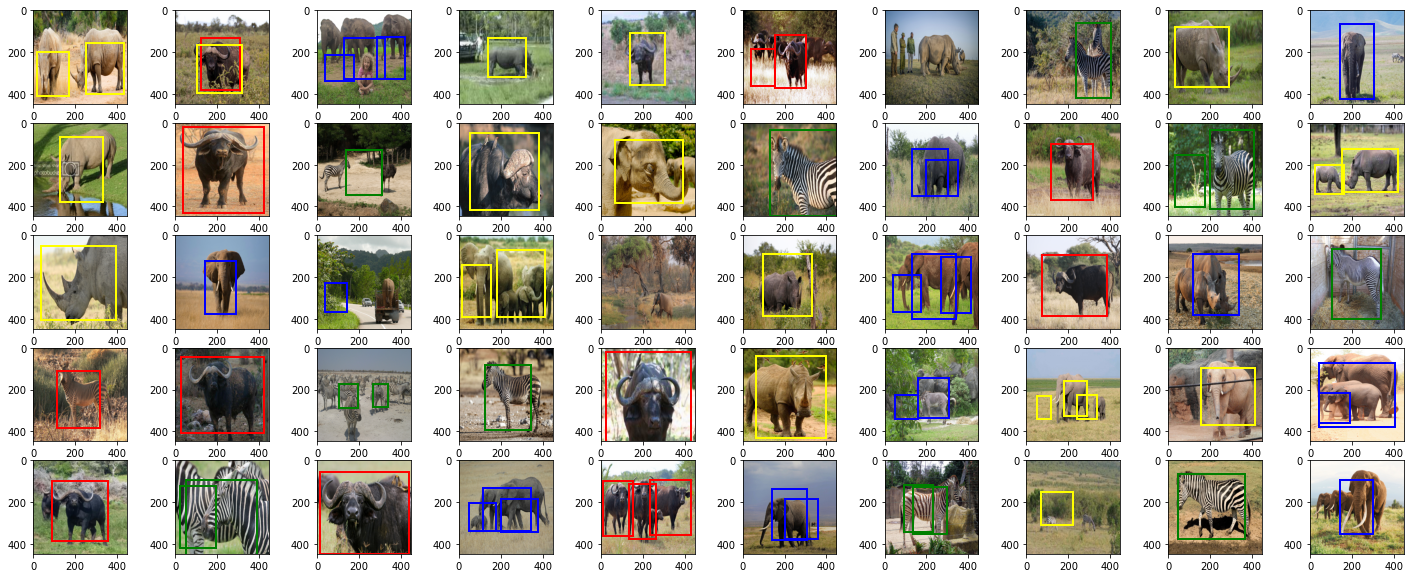

In [18]:
# plot predictions
fig, ax = plt.subplots(5, 10, figsize=(25, 10))
for idx in range(50):
    bbx = pred[idx]
    plot_bbox(idx, test_set, bbx, ax=ax.flatten()[idx])

In [19]:
# map
gt = {}
gt = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in true_boxes:
    gt[box[0]].append(box[1:])
    
predictions = convert_dict(pred)
target = convert_dict(gt, with_score=False)

th = torch.arange(0.5, 1, 0.05).tolist()
m_ap = MeanAveragePrecision(box_format='xywh', iou_type="bbox", iou_thresholds=th)
m_ap.update(predictions, target)
ap = m_ap.compute()

In [20]:
ap 

{'map': tensor(0.1029),
 'map_50': tensor(0.2366),
 'map_75': tensor(0.0745),
 'map_small': tensor(0.1029),
 'map_medium': tensor(-1.),
 'map_large': tensor(-1.),
 'mar_1': tensor(0.1307),
 'mar_10': tensor(0.1544),
 'mar_100': tensor(0.1544),
 'mar_small': tensor(0.1544),
 'mar_medium': tensor(-1.),
 'mar_large': tensor(-1.),
 'map_per_class': tensor(-1.),
 'mar_100_per_class': tensor(-1.)}

# 5. S = 10

In [21]:
S = 10 

In [22]:
# load data
transform = transforms.Compose([transforms.Resize((448, 448)), transforms.ToTensor(), transforms.Normalize(0,1)])

train_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, transform=transform)
train_loader = DataLoader(dataset = train_set, batch_size = TRAIN_BATCH_SIZE, shuffle = True)

test_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, istesting=True, transform=transform)
test_loader = DataLoader(dataset=test_set, batch_size=TEST_BATCH_SIZE, shuffle= False)

In [23]:
# model
model_s10 = YOLO2(input_channels=3, S=S, B=B, C=C).to(DEVICE)
optimizer = optim.Adam(model_s10.parameters(), lr=LEARNING_RATE)
criterion = YoloLoss(S=S, B=B, C=C)

In [24]:
# training 
loss_hist = train(train_loader, model_s10, optimizer, criterion, EPOCHS, DEVICE, 
                  ckpt_filename='experiment_2/model_S10.tar', load_model=False, save_epochs=5)

100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.133] 


 EPOCH 1:  Mean loss 0.152


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0806]


 EPOCH 2:  Mean loss 0.086


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0427]


 EPOCH 3:  Mean loss 0.055


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0277]


 EPOCH 4:  Mean loss 0.039


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0335]


 EPOCH 5:  Mean loss 0.033
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0272]


 EPOCH 6:  Mean loss 0.030


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.028] 


 EPOCH 7:  Mean loss 0.028


100%|██████████| 60/60 [00:28<00:00,  2.11it/s, loss=0.0206]


 EPOCH 8:  Mean loss 0.027


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0262]


 EPOCH 9:  Mean loss 0.026


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0203]


 EPOCH 10:  Mean loss 0.025
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0229]


 EPOCH 11:  Mean loss 0.024


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0269]


 EPOCH 12:  Mean loss 0.024


100%|██████████| 60/60 [00:28<00:00,  2.11it/s, loss=0.0183]


 EPOCH 13:  Mean loss 0.023


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0239]


 EPOCH 14:  Mean loss 0.022


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0232]


 EPOCH 15:  Mean loss 0.021
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0199]


 EPOCH 16:  Mean loss 0.021


100%|██████████| 60/60 [00:28<00:00,  2.10it/s, loss=0.0201]


 EPOCH 17:  Mean loss 0.020


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0199]


 EPOCH 18:  Mean loss 0.019


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.014] 


 EPOCH 19:  Mean loss 0.018


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0149]


 EPOCH 20:  Mean loss 0.018
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.09it/s, loss=0.0162]


 EPOCH 21:  Mean loss 0.017


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0135]


 EPOCH 22:  Mean loss 0.016


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0193] 


 EPOCH 23:  Mean loss 0.016


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0109]


 EPOCH 24:  Mean loss 0.015


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.0208] 


 EPOCH 25:  Mean loss 0.014
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0143] 


 EPOCH 26:  Mean loss 0.014


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0155] 


 EPOCH 27:  Mean loss 0.013


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0184] 


 EPOCH 28:  Mean loss 0.013


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.0125] 


 EPOCH 29:  Mean loss 0.012


100%|██████████| 60/60 [00:28<00:00,  2.10it/s, loss=0.0126] 


 EPOCH 30:  Mean loss 0.011
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0121] 


 EPOCH 31:  Mean loss 0.011


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.0229] 


 EPOCH 32:  Mean loss 0.011


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.0177] 


 EPOCH 33:  Mean loss 0.010


100%|██████████| 60/60 [00:31<00:00,  1.90it/s, loss=0.0115] 


 EPOCH 34:  Mean loss 0.010


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00984]


 EPOCH 35:  Mean loss 0.009
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.00535]


 EPOCH 36:  Mean loss 0.009


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00882]


 EPOCH 37:  Mean loss 0.009


100%|██████████| 60/60 [00:28<00:00,  2.11it/s, loss=0.00815]


 EPOCH 38:  Mean loss 0.009


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.00716]


 EPOCH 39:  Mean loss 0.008


100%|██████████| 60/60 [00:27<00:00,  2.14it/s, loss=0.00737]


 EPOCH 40:  Mean loss 0.008
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.00784]


 EPOCH 41:  Mean loss 0.008


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.00822]


 EPOCH 42:  Mean loss 0.007


100%|██████████| 60/60 [00:28<00:00,  2.13it/s, loss=0.00594]


 EPOCH 43:  Mean loss 0.007


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00655]


 EPOCH 44:  Mean loss 0.007


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00575]


 EPOCH 45:  Mean loss 0.006
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00557]


 EPOCH 46:  Mean loss 0.006


100%|██████████| 60/60 [00:28<00:00,  2.11it/s, loss=0.0126] 


 EPOCH 47:  Mean loss 0.006


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.00606]


 EPOCH 48:  Mean loss 0.006


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0057] 


 EPOCH 49:  Mean loss 0.006


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00457]


 EPOCH 50:  Mean loss 0.006
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.09it/s, loss=0.00554]


 EPOCH 51:  Mean loss 0.006


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.0058] 


 EPOCH 52:  Mean loss 0.006


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00641]


 EPOCH 53:  Mean loss 0.005


100%|██████████| 60/60 [00:27<00:00,  2.15it/s, loss=0.00625]


 EPOCH 54:  Mean loss 0.005


100%|██████████| 60/60 [00:28<00:00,  2.09it/s, loss=0.00557]


 EPOCH 55:  Mean loss 0.005
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.12it/s, loss=0.00456]


 EPOCH 56:  Mean loss 0.005


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00486]


 EPOCH 57:  Mean loss 0.005


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00424]


 EPOCH 58:  Mean loss 0.005


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00378]


 EPOCH 59:  Mean loss 0.004


100%|██████████| 60/60 [00:28<00:00,  2.09it/s, loss=0.0031] 


 EPOCH 60:  Mean loss 0.004
-> Saving checkpoint


100%|██████████| 60/60 [00:28<00:00,  2.14it/s, loss=0.00463]

 EPOCH 61:  Mean loss 0.004


Text(0, 0.5, 'Loss')

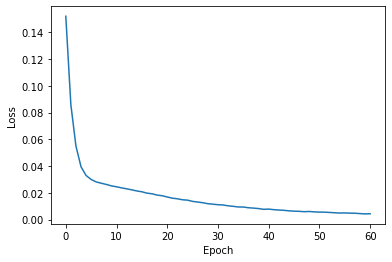

In [25]:
# plot training loss
plt.plot(range(len(loss_hist)), loss_hist)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [42]:
# testing 
y_pred, y_true = test(test_loader, model_s10, DEVICE, filter_params=[0.6, True])
# non-max-suppression
pred_boxes, true_boxes = get_boxes(y_pred, y_true)

pred = {}
pred = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in pred_boxes:
    pred[box[0]].append(box[1:])

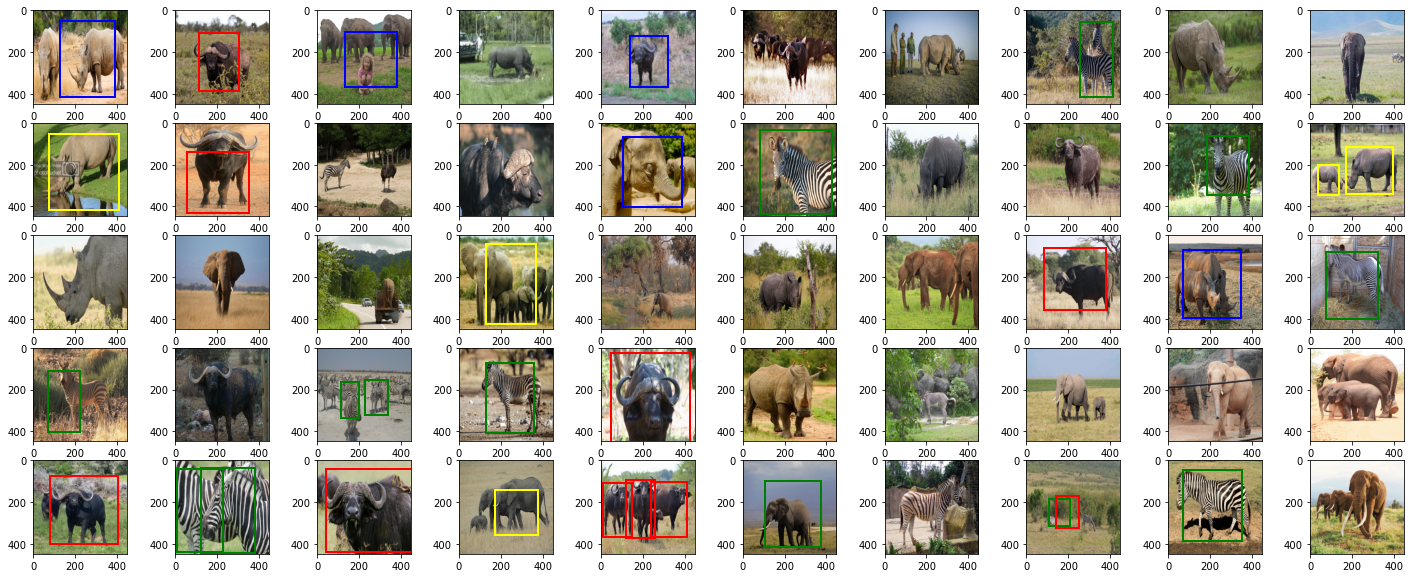

In [43]:
# plot predictions
fig, ax = plt.subplots(5, 10, figsize=(25, 10))
for idx in range(50):
    bbx = pred[idx]
    plot_bbox(idx, test_set, bbx, ax=ax.flatten()[idx])

In [44]:
# map
gt = {}
gt = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in true_boxes:
    gt[box[0]].append(box[1:])
    
predictions = convert_dict(pred)
target = convert_dict(gt, with_score=False)

th = torch.arange(0.5, 1, 0.05).tolist()
m_ap = MeanAveragePrecision(box_format='xywh', iou_type="bbox", iou_thresholds=th)
m_ap.update(predictions, target)
ap = m_ap.compute()

In [45]:
ap

{'map': tensor(0.0770),
 'map_50': tensor(0.1709),
 'map_75': tensor(0.0623),
 'map_small': tensor(0.0770),
 'map_medium': tensor(-1.),
 'map_large': tensor(-1.),
 'mar_1': tensor(0.0857),
 'mar_10': tensor(0.0978),
 'mar_100': tensor(0.0978),
 'mar_small': tensor(0.0978),
 'mar_medium': tensor(-1.),
 'mar_large': tensor(-1.),
 'map_per_class': tensor(-1.),
 'mar_100_per_class': tensor(-1.)}

# Observations

In [49]:
summary = {
    
    'S=2': 0.1150, 
    'S=3': 0.1303,
    'S=5': 0.0959,
    'S=7': 0.1029,
    'S=10': 0.0770,
}

- The higher the S, the faster the loss converges, although the accuracy gets lower. 
